Pytorch로 Logistic Regression 구현

In [79]:
#학습 데이터 생성

import torch

x_train=torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train=torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

#w,b 초기화
#learning rate 설정

w=torch.zeros(1,1) #0으로만 된 tensor
b=torch.zeros(1,1)


lr=1.0

#반복횟수 설정
#w,b의 requires_grad 를 true로 설정

for epoch in range(3001):
  w.requires_grad_(True) #기억, float
  b.requires_grad_(True)




#hypothesis, cost 설정

hypothesis=torch.sigmoid(torch.mm(x_train,w)+b)
cost=torch.mean(
    -y_train*torch.log(hypothesis)
    -(1-y_train)*torch.log(1-hypothesis)
)


#경사계산
#w,b 업데이트

cost.backward()
with torch.no_grad() as grd:
  w=w-lr*w.grad
  b=b-lr*b.grad

#학습이 잘 되는지 확인하기 위한 내용 출력
if epoch%100==0:
  print("epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}".format(epoch,cost.item(),w.squeeze(),b.squeeze())) #epoch: 3000, cost: 0.693147, w: -0.154167, b: 0.083333




x_test=torch.FloatTensor([[4.5],[1.1]])
test_result=torch.sigmoid(torch.mm(x_test,w)+b)
print(torch.round(test_result))

epoch: 3000, cost: 0.693147, w: -0.154167, b: 0.083333
tensor([[0.],
        [0.]])


여러가지 optimizer 사용해보기

In [80]:
optimizer=torch.optim.SGD([w,b],lr=1.0)
#optimizer=torch.optim.Adam([w,b],lr=1.0)
#optimizer=torch.optim.Adadelta([w,b])
#optimizer=torch.optim.Adagrad([w,b])
#optimizer=torch.optim.RMSprop([w,b])

#학습 데이터 생성

import torch

x_train=torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train=torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

#w,b 초기화
#learning rate 설정

w=torch.zeros(1,1) #0으로만 된 tensor
b=torch.zeros(1,1)

lr=1.0

#반복횟수 설정
#w,b의 requires_grad 를 true로 설정

for epoch in range(3001):
  w.requires_grad_(True) #기억, float
  b.requires_grad_(True)



#hypothesis, cost 설정

hypothesis=torch.sigmoid(torch.mm(x_train,w)+b)
cost=torch.mean(
    -y_train*torch.log(hypothesis)
    -(1-y_train)*torch.log(1-hypothesis)
)


#경사계산
#w,b 업데이트
optimizer.zero_grad()
cost.backward()
optimizer.step()


#학습이 잘 되는지 확인하기 위한 내용 출력
if epoch%100==0:
  print("epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}".format(epoch,cost.item(),w.squeeze(),b.squeeze())) #epoch: 3000, cost: 0.693147, w: -0.154167, b: 0.083333


#x=[4.5] or [1.1] 일때, y=0? y=1?
x_test=torch.FloatTensor([[4.5],[1.1]])
test_result=torch.sigmoid(torch.mm(x_test,w)+b)
print(torch.round(test_result))


epoch: 3000, cost: 0.693147, w: 0.000000, b: 0.000000
tensor([[0.],
        [0.]], grad_fn=<RoundBackward>)


Matplotlib 으로 결과 시각화

epoch: 3000, cost: 0.693147, w: -0.154167, b: 0.083333


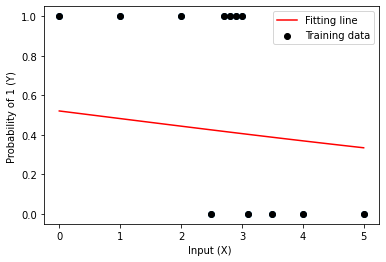

In [81]:


import torch
import matplotlib.pyplot as plt
#학습 데이터 생성


x_train=torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train=torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

#w,b 초기화
#learning rate 설정

w=torch.zeros(1,1) #0으로만 된 tensor
b=torch.zeros(1,1)


lr=1.0

#반복횟수 설정
#w,b의 requires_grad 를 true로 설정

for epoch in range(3001):
  w.requires_grad_(True) #기억, float
  b.requires_grad_(True)




#hypothesis, cost 설정

hypothesis=torch.sigmoid(torch.mm(x_train,w)+b)
cost=torch.mean(
    -y_train*torch.log(hypothesis)
    -(1-y_train)*torch.log(1-hypothesis)
)


#경사계산
#w,b 업데이트

cost.backward()
with torch.no_grad() as grd:
  w=w-lr*w.grad
  b=b-lr*b.grad

#학습이 잘 되는지 확인하기 위한 내용 출력
if epoch%100==0:
  print("epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}".format(epoch,cost.item(),w.squeeze(),b.squeeze())) #epoch: 3000, cost: 0.693147, w: -0.154167, b: 0.083333




w.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train)

X=torch.linspace(0,5,100).unsqueeze(1)
Y=torch.sigmoid(torch.mm(X,w)+b)

plt.ylabel("Probability of 1 (Y) ")
plt.xlabel("Input (X) ")
plt.scatter(x_train,y_train,c="black",label="Training data")

plt.plot(X,Y,c="#ff0000",label="Fitting line")
plt.legend()
plt.show()

[[-3.10385806]] [9.39776831]
[0 1]


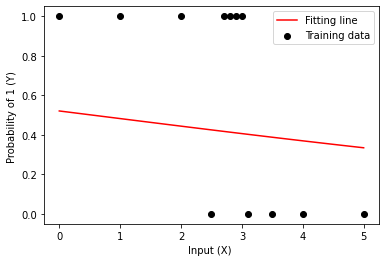

In [83]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

x_train=[[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train=[1,1,1,0,0,0,0,1,0,1,1,1] #입력 shape이 pytorch에서와 다름에 주의!

model=LogisticRegression(penalty='none')
#penalty or regularization은 추후 설명
model.fit(x_train,y_train)

#w와 b에 해당하는 값 출력
print(model.coef_,model.intercept_)

#새로운 x값이 주어질 때, y값 예측해보기
x_test=[[4.5],[1.1]]
test_result=model.predict(x_test)
print(test_result)

plt.ylabel("Probability of 1 (Y) ")
plt.xlabel("Input (X) ")
plt.scatter(x_train,y_train,c="black",label="Training data")

plt.plot(X,Y,c="#ff0000",label="Fitting line")
plt.legend()
plt.show()